<a href="https://colab.research.google.com/github/chominyeong/2023_Manufacturing-BigData_Analytics_Competition/blob/main/OBDsimulation_compare_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import random

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

### 중앙값

#### 등간격 상하한 0.0001

In [ ]:
cate_num=19
N=1

MED1_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED1_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED1_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.0001
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.median(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.median(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    MED1_mse[j1][j2]=np.mean(MSE_list)
    MED1_accuracy1[j1][j2]=np.mean(accuracy1_list)
    MED1_accuracy2[j1][j2]=np.mean(accuracy2_list)


In [ ]:
MED1_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,56.601,55.056,61.012,65.341,67.515,70.609,70.773,71.703,71.813,73.784,72.615,74.127,72.365,74.888,72.861,74.941,74.125,74.931,74.606
1,56.139,61.268,60.483,64.351,66.135,67.481,66.612,67.994,67.928,70.790,71.164,71.139,69.756,71.519,72.156,69.556,72.662,69.846,71.309
2,59.868,58.688,64.261,69.769,71.881,75.623,74.662,76.296,76.369,77.822,77.649,79.370,77.124,80.149,79.022,79.010,79.538,79.077,79.758
3,63.584,61.458,68.394,71.038,77.506,77.535,79.600,79.130,81.424,82.201,82.720,84.123,80.748,85.219,83.399,83.491,84.143,84.284,84.201
4,64.649,59.982,69.501,73.165,76.895,81.537,80.244,82.029,83.522,84.666,84.421,86.216,84.816,86.939,86.395,85.973,87.724,85.887,87.284
5,67.929,60.856,73.010,74.269,79.506,80.410,82.895,83.534,86.192,86.075,87.887,87.619,87.718,88.012,88.665,87.942,89.234,88.422,89.220
6,64.064,60.724,71.483,75.270,80.084,82.717,84.656,86.507,87.302,88.894,87.992,88.883,89.145,89.229,89.403,89.758,89.918,90.029,89.957
7,67.487,63.918,72.547,78.179,81.360,84.146,85.942,86.729,89.214,88.116,89.829,89.578,89.954,90.385,90.473,90.517,90.578,90.960,90.897
8,66.761,64.370,72.315,78.514,81.148,83.992,86.555,88.232,88.194,90.001,89.840,89.751,91.590,90.270,91.544,91.437,91.730,91.681,91.756
9,67.949,63.871,73.029,78.546,83.860,86.334,87.077,87.736,89.344,89.736,90.133,91.819,89.167,92.850,91.027,91.972,92.055,92.095,92.382


In [ ]:
MED1_mse.to_csv("Med1_mse.csv", index = False)

In [ ]:
MED1_accuracy1.to_csv("Med1_accuracy1.csv", index = False)

In [ ]:
MED1_accuracy2.to_csv("Med1_accuracy2.csv", index = False)

#### 0.001

In [ ]:
cate_num=19
N=1

MED2_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED2_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED2_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.001
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.median(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.median(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    MED2_mse[j1][j2]=np.mean(MSE_list)
    MED2_accuracy1[j1][j2]=np.mean(accuracy1_list)
    MED2_accuracy2[j1][j2]=np.mean(accuracy2_list)


In [ ]:
MED2_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,56.601,59.512,63.642,68.775,69.101,73.107,71.056,72.834,72.549,74.316,72.233,74.530,73.839,75.024,74.122,73.978,75.267,74.735,75.170
1,59.929,63.915,67.780,68.619,71.945,70.791,72.632,75.579,76.338,76.163,75.210,76.956,77.726,74.996,77.766,77.373,77.017,76.694,77.155
2,61.878,65.368,70.596,76.524,77.260,77.851,79.547,81.211,80.643,83.510,79.640,83.940,83.922,81.578,83.917,82.970,83.930,83.270,83.655
3,66.536,67.347,75.403,77.114,81.123,80.435,82.916,84.502,85.565,86.203,85.235,86.732,87.042,85.607,87.253,87.016,87.086,87.126,87.226
4,63.860,66.319,74.198,79.785,82.210,83.595,84.891,87.325,87.116,88.046,88.497,88.252,89.015,88.478,89.179,89.250,88.838,89.376,89.386
5,69.066,70.786,75.861,80.850,84.405,85.502,87.818,87.610,89.134,89.018,89.632,90.024,90.111,89.980,90.306,90.763,90.030,90.895,90.681
6,66.780,69.991,76.390,82.004,84.433,87.181,87.557,89.802,89.209,89.826,91.172,90.358,91.129,91.445,91.341,91.502,91.475,91.610,91.905
7,68.632,70.491,77.584,83.325,86.568,87.210,88.817,89.373,89.951,91.839,89.411,92.137,91.580,91.506,92.046,92.145,92.216,92.343,92.367
8,68.385,68.170,76.207,80.771,84.758,87.792,89.215,90.035,91.035,89.453,93.520,90.845,92.370,92.528,92.392,92.667,92.924,92.889,92.997
9,69.385,70.591,78.015,83.755,86.939,87.476,89.227,90.497,90.816,92.211,91.084,92.843,93.271,91.848,93.449,93.048,93.301,93.278,93.506


In [ ]:
MED2_mse.to_csv("Med2_mse.csv", index = False)

In [ ]:
MED2_accuracy1.to_csv("Med2_accuracy1.csv", index = False)

In [ ]:
MED2_accuracy2.to_csv("Med2_accuracy2.csv", index = False)

#### 0.0013

In [ ]:
cate_num=19
N=1

MED3_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED3_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
MED3_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.001
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.median(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.median(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    MED3_mse[j1][j2]=np.mean(MSE_list)
    MED3_accuracy1[j1][j2]=np.mean(accuracy1_list)
    MED3_accuracy2[j1][j2]=np.mean(accuracy2_list)


In [ ]:
MED3_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,56.601,59.512,63.642,68.775,69.101,73.107,71.056,72.834,72.549,74.316,72.233,74.530,73.839,75.024,74.122,73.978,75.267,74.735,75.170
1,59.929,63.915,67.780,68.619,71.945,70.791,72.632,75.579,76.338,76.163,75.210,76.956,77.726,74.996,77.766,77.373,77.017,76.694,77.155
2,61.878,65.368,70.596,76.524,77.260,77.851,79.547,81.211,80.643,83.510,79.640,83.940,83.922,81.578,83.917,82.970,83.930,83.270,83.655
3,66.536,67.347,75.403,77.114,81.123,80.435,82.916,84.502,85.565,86.203,85.235,86.732,87.042,85.607,87.253,87.016,87.086,87.126,87.226
4,63.860,66.319,74.198,79.785,82.210,83.595,84.891,87.325,87.116,88.046,88.497,88.252,89.015,88.478,89.179,89.250,88.838,89.376,89.386
5,69.066,70.786,75.861,80.850,84.405,85.502,87.818,87.610,89.134,89.018,89.632,90.024,90.111,89.980,90.306,90.763,90.030,90.895,90.681
6,66.780,69.991,76.390,82.004,84.433,87.181,87.557,89.802,89.209,89.826,91.172,90.358,91.129,91.445,91.341,91.502,91.475,91.610,91.905
7,68.632,70.491,77.584,83.325,86.568,87.210,88.817,89.373,89.951,91.839,89.411,92.137,91.580,91.506,92.046,92.145,92.216,92.343,92.367
8,68.385,68.170,76.207,80.771,84.758,87.792,89.215,90.035,91.035,89.453,93.520,90.845,92.370,92.528,92.392,92.667,92.924,92.889,92.997
9,69.385,70.591,78.015,83.755,86.939,87.476,89.227,90.497,90.816,92.211,91.084,92.843,93.271,91.848,93.449,93.048,93.301,93.278,93.506


In [ ]:
MED3_mse.to_csv("Med3_mse.csv", index = False)

In [ ]:
MED3_accuracy1.to_csv("Med3_accuracy1.csv", index = False)

In [ ]:
MED3_accuracy2.to_csv("Med3_accuracy2.csv", index = False)

### 평균값

#### 0.0001

In [ ]:
cate_num=19
N=1

Mean1_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean1_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean1_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.0001
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.mean(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.mean(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    Mean1_mse[j1][j2]=np.mean(MSE_list)
    Mean1_accuracy1[j1][j2]=np.mean(accuracy1_list)
    Mean1_accuracy2[j1][j2]=np.mean(accuracy2_list)

In [ ]:
Mean1_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,60.424,53.862,63.541,66.868,67.386,70.609,70.202,73.418,69.237,72.643,72.183,74.877,72.711,74.159,73.672,74.898,71.666,75.544,74.323
1,49.519,61.268,59.738,64.248,66.023,67.296,66.668,67.766,68.176,70.759,71.361,71.006,69.760,71.713,72.168,69.853,72.316,70.088,71.005
2,61.219,58.549,62.886,71.524,71.901,75.617,75.795,78.190,76.335,77.749,77.643,79.420,77.844,80.224,77.343,80.745,79.348,80.706,79.960
3,60.677,61.098,68.263,70.856,77.496,77.708,79.960,79.752,81.425,82.494,83.025,84.110,81.316,85.224,83.238,84.002,83.413,84.294,84.234
4,57.908,61.256,69.515,74.051,77.307,82.124,81.303,82.281,83.441,85.181,85.090,86.314,84.826,87.248,86.767,86.308,87.723,86.393,87.363
5,63.975,60.799,73.108,73.696,80.837,81.110,82.921,83.476,86.597,86.252,87.882,87.601,87.981,88.195,88.751,87.793,89.246,88.378,89.320
6,65.574,60.961,70.381,75.616,80.013,83.532,84.595,86.482,87.191,88.889,88.066,88.946,89.302,89.386,89.489,89.798,89.920,90.072,90.022
7,66.278,63.926,74.247,78.051,81.743,83.959,85.927,86.748,89.213,88.128,89.859,89.772,89.944,90.349,90.544,90.572,90.589,90.962,90.906
8,66.656,64.496,71.996,78.525,81.516,84.314,86.148,88.371,88.342,90.022,89.840,89.820,91.637,90.321,91.631,91.449,91.736,91.685,91.741
9,65.961,63.818,72.648,79.024,83.854,86.345,87.224,88.105,89.339,89.833,90.157,91.864,89.285,92.853,90.907,91.976,92.058,92.152,92.375


In [ ]:
Mean1_mse.to_csv("Mean1_mse.csv", index = False)

In [ ]:
Mean1_accuracy1.to_csv("Mean1_accuracy1.csv", index = False)

In [ ]:
Mean1_accuracy2.to_csv("Mean1_accuracy2.csv", index = False)

#### 0.001

In [ ]:
cate_num=19
N=1

Mean2_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean2_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean2_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.001
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.mean(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.mean(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    Mean2_mse[j1][j2]=np.mean(MSE_list)
    Mean2_accuracy1[j1][j2]=np.mean(accuracy1_list)
    Mean2_accuracy2[j1][j2]=np.mean(accuracy2_list)

In [ ]:
Mean2_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,60.424,59.512,62.254,70.068,69.101,72.933,71.997,73.777,72.357,74.924,72.756,74.671,72.804,75.422,72.757,74.193,73.902,74.351,73.826
1,53.927,63.809,67.639,68.693,71.905,71.147,72.471,75.545,76.181,76.166,75.219,76.515,77.819,74.601,77.798,75.999,77.266,76.531,77.137
2,61.715,65.368,70.301,76.352,77.311,80.514,79.436,81.211,80.822,83.478,80.650,83.919,83.243,83.326,83.641,83.048,83.979,83.313,83.726
3,62.464,67.118,75.362,77.265,82.527,80.876,83.335,84.633,85.521,86.414,85.238,87.094,87.225,85.752,87.360,86.965,87.393,87.092,87.599
4,63.669,66.347,75.297,79.996,82.173,83.653,85.027,87.474,87.121,88.137,88.557,88.467,89.106,88.498,89.299,89.190,88.919,89.418,89.417
5,65.770,70.370,77.221,81.844,84.264,85.685,88.051,87.860,89.261,88.958,89.608,90.136,90.268,89.995,90.320,90.818,90.053,90.906,90.601
6,66.094,66.062,75.911,80.715,84.492,87.072,87.609,89.759,89.293,89.809,91.204,90.443,91.154,91.492,91.377,91.494,91.377,91.615,91.901
7,65.310,70.485,77.718,83.356,86.535,87.180,88.870,89.464,89.967,91.891,89.424,92.175,91.587,91.646,92.048,92.145,92.221,92.334,92.365
8,68.385,68.581,77.246,81.447,84.961,87.935,89.319,90.058,91.164,89.579,93.520,90.902,92.369,92.558,92.379,92.655,92.939,92.870,93.006
9,63.612,70.515,78.669,84.023,87.195,87.408,89.271,90.542,90.871,92.258,91.060,92.856,93.296,91.857,93.467,93.012,93.297,93.300,93.506


In [ ]:
Mean2_mse.to_csv("Mean2_mse.csv", index = False)

In [ ]:
Mean2_accuracy1.to_csv("Mean2_accuracy1.csv", index = False)

In [ ]:
Mean2_accuracy2.to_csv("Mean2_accuracy2.csv", index = False)

#### 0.0013

In [ ]:
cate_num=19
N=1

Mean3_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean3_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean3_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.0013
      Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.mean(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.mean(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    Mean3_mse[j1][j2]=np.mean(MSE_list)
    Mean3_accuracy1[j1][j2]=np.mean(accuracy1_list)
    Mean3_accuracy2[j1][j2]=np.mean(accuracy2_list)

In [ ]:
Mean3_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,60.424,59.955,62.455,68.624,69.189,72.978,69.992,72.568,71.739,74.367,72.814,74.822,72.285,75.303,74.293,73.868,74.170,74.222,73.940
1,54.511,64.271,68.745,69.763,72.569,71.733,73.304,76.196,76.870,76.866,75.408,76.718,78.743,75.669,77.727,78.037,78.000,77.282,77.688
2,58.869,66.161,71.180,77.467,77.739,81.031,80.195,81.861,81.125,84.285,81.373,84.200,83.828,83.116,83.978,83.809,84.469,83.776,84.146
3,62.777,67.557,76.023,77.811,82.829,81.403,83.952,84.993,85.992,86.825,85.689,87.091,87.716,86.413,87.560,87.289,87.615,87.675,87.862
4,63.675,67.318,76.271,80.553,82.750,84.407,85.606,87.890,87.435,88.353,88.771,88.548,89.401,88.846,89.381,89.655,89.251,89.652,89.530
5,65.843,71.001,76.412,82.412,84.999,86.058,88.457,87.851,89.373,89.610,89.711,90.309,90.206,90.341,90.316,91.090,90.221,90.883,90.818
6,66.631,70.346,76.695,82.309,84.950,87.695,87.934,89.943,90.049,89.746,91.504,90.826,91.458,91.583,91.503,91.619,91.811,91.740,92.094
7,65.882,71.505,78.562,84.142,86.858,87.699,89.181,89.809,89.886,92.408,89.538,92.146,91.837,91.926,92.272,92.168,92.280,92.483,92.451
8,68.481,69.046,78.155,80.994,85.990,88.295,89.400,90.243,91.526,89.681,93.481,91.850,92.267,92.883,92.746,92.806,93.100,93.180,93.134
9,63.871,71.128,79.732,84.340,87.097,87.756,89.519,90.551,91.046,92.165,91.679,92.586,93.674,91.752,93.417,93.152,93.295,93.325,93.671


In [ ]:
Mean3_mse.to_csv("Mean3_mse.csv", index = False)

In [ ]:
Mean3_accuracy1.to_csv("Mean3_accuracy1.csv", index = False)

In [ ]:
Mean3_accuracy2.to_csv("Mean3_accuracy2.csv", index = False)

### 등면적

#### 중앙값

In [ ]:
cate_num=19
N=1

Med_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Med_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Med_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.0013
      Tbins = [-np.inf]+[rv1.ppf(k/Tnum) for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(k/Snum) for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.median(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.median(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    Med_mse[j1][j2]=np.mean(MSE_list)
    Med_accuracy1[j1][j2]=np.mean(accuracy1_list)
    Med_accuracy2[j1][j2]=np.mean(accuracy2_list)

In [ ]:
Med_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,56.601,65.978,66.937,69.941,69.622,71.990,72.149,72.872,72.550,72.852,73.723,73.579,73.402,73.497,73.822,74.263,74.603,74.475,74.682
1,65.487,70.067,74.462,76.382,78.790,78.974,79.263,80.462,80.611,80.631,80.757,80.945,81.047,81.795,82.022,81.690,81.925,81.910,81.691
2,65.060,73.727,77.304,79.231,81.597,82.448,83.190,83.638,84.566,84.664,84.612,85.000,85.166,84.844,85.198,85.398,85.574,85.763,85.744
3,65.859,76.099,78.682,81.204,83.023,84.239,85.499,86.412,86.334,86.086,86.192,86.491,87.098,87.325,87.760,87.957,88.294,88.314,88.277
4,65.823,75.841,79.901,83.143,83.806,85.826,86.727,86.628,86.814,88.389,88.925,89.214,88.879,88.970,88.798,88.919,89.151,89.507,89.927
5,68.500,75.157,81.422,82.891,86.011,86.520,86.456,87.789,88.874,89.085,89.177,89.737,89.979,90.176,90.367,90.564,90.408,90.435,90.412
6,68.844,75.888,81.877,83.360,86.312,86.725,87.838,88.617,89.170,89.505,90.221,90.540,90.564,91.014,91.347,91.299,91.201,91.309,91.386
7,68.841,76.707,82.039,83.875,86.892,86.672,88.535,89.031,89.749,90.102,90.418,90.980,91.293,91.318,91.469,91.796,92.140,92.088,92.161
8,67.724,77.390,81.839,85.198,86.119,87.823,89.158,89.606,90.206,90.739,91.197,91.558,91.220,91.822,92.204,92.309,92.143,92.181,92.702
9,67.792,78.323,82.543,85.381,86.794,88.440,89.374,89.932,90.458,91.383,91.169,91.471,91.945,92.240,92.254,92.296,92.821,92.874,92.895


In [ ]:
Med_mse.to_csv("Med_mse.csv", index = False)

In [ ]:
Med_accuracy1.to_csv("Med_accuracy1.csv", index = False)

In [ ]:
Med_accuracy2.to_csv("Med_accuracy2.csv", index = False)

#### 평균값

In [ ]:
cate_num=19
N=1

Mean_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
Mean_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

for j1 in range(cate_num):
  for j2 in range(cate_num):
    Tnum=j1+2
    Snum=j2+2

    MSE_list=[0.01]*N
    accuracy1_list=[0.01]*N
    accuracy2_list=[0.01]*N

    for i in range(N):
      n=100000 #sample size

      np.random.seed(1906+i)
      Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
      Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
      simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
      simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
      simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

      rv1 = stats.norm(16.5212,0.0189)
      rv2 = stats.norm(24.8696,0.0072)
      reject=0.0013
      Tbins = [-np.inf]+[rv1.ppf(k/Tnum) for k in range(1,Tnum)]+[np.inf]
      Sbins = [-np.inf]+[rv2.ppf(k/Snum) for k in range(1,Snum)]+[np.inf]

      simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
      simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

      for l in range(Tnum):
        for m in range(Snum):
          tvalue=np.median(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
          svalue=np.median(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
          simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

      MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
      accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
      accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000

    Mean_mse[j1][j2]=np.mean(MSE_list)
    Mean_accuracy1[j1][j2]=np.mean(accuracy1_list)
    Mean_accuracy2[j1][j2]=np.mean(accuracy2_list)

In [ ]:
Mean_accuracy2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,56.601,65.978,66.937,69.941,69.622,71.990,72.149,72.872,72.550,72.852,73.723,73.579,73.402,73.497,73.822,74.263,74.603,74.475,74.682
1,65.487,70.067,74.462,76.382,78.790,78.974,79.263,80.462,80.611,80.631,80.757,80.945,81.047,81.795,82.022,81.690,81.925,81.910,81.691
2,65.060,73.727,77.304,79.231,81.597,82.448,83.190,83.638,84.566,84.664,84.612,85.000,85.166,84.844,85.198,85.398,85.574,85.763,85.744
3,65.859,76.099,78.682,81.204,83.023,84.239,85.499,86.412,86.334,86.086,86.192,86.491,87.098,87.325,87.760,87.957,88.294,88.314,88.277
4,65.823,75.841,79.901,83.143,83.806,85.826,86.727,86.628,86.814,88.389,88.925,89.214,88.879,88.970,88.798,88.919,89.151,89.507,89.927
5,68.500,75.157,81.422,82.891,86.011,86.520,86.456,87.789,88.874,89.085,89.177,89.737,89.979,90.176,90.367,90.564,90.408,90.435,90.412
6,68.844,75.888,81.877,83.360,86.312,86.725,87.838,88.617,89.170,89.505,90.221,90.540,90.564,91.014,91.347,91.299,91.201,91.309,91.386
7,68.841,76.707,82.039,83.875,86.892,86.672,88.535,89.031,89.749,90.102,90.418,90.980,91.293,91.318,91.469,91.796,92.140,92.088,92.161
8,67.724,77.390,81.839,85.198,86.119,87.823,89.158,89.606,90.206,90.739,91.197,91.558,91.220,91.822,92.204,92.309,92.143,92.181,92.702
9,67.792,78.323,82.543,85.381,86.794,88.440,89.374,89.932,90.458,91.383,91.169,91.471,91.945,92.240,92.254,92.296,92.821,92.874,92.895


In [ ]:
Mean_mse.to_csv("Mean_mse.csv", index = False)

In [ ]:
Mean_accuracy1.to_csv("Mean_accuracy1.csv", index = False)

In [ ]:
Mean_accuracy2.to_csv("Mean_accuracy2.csv", index = False)

### 100x1000 신뢰구간

In [ ]:
#cate_num=19
N=100

#Mean3_mse=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
#Mean3_accuracy1=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])
#Mean3_accuracy2=pd.DataFrame([[0.01 for col in range(cate_num)] for row in range(cate_num)])

#for j1 in range(cate_num):
#  for j2 in range(cate_num):
Tnum=8
Snum=10

MSE_list=[0.01]*N
accuracy1_list=[0.01]*N
accuracy2_list=[0.01]*N

for i in range(N):
  n=1000 #sample size

  np.random.seed(1906+i)
  Tdata=np.random.normal(16.5212, 0.0189, (n, 1))
  Sdata=np.random.normal(24.8696, 0.0072, (n, 1))
  simulDF=pd.DataFrame(np.concatenate((Tdata,Sdata),axis=1),columns=["Tmean","Smean"])
  simulDF['BallSize']=12.0385+0.2072*simulDF['Tmean']-0.4534	*simulDF['Smean']
  simulDF['BallSize_descrete']=(simulDF['BallSize']*500).round() * 0.002

  rv1 = stats.norm(16.5212,0.0189)
  rv2 = stats.norm(24.8696,0.0072)
  reject=0.0013
  Tbins = [-np.inf]+[rv1.ppf(reject)+(rv1.ppf(1-reject)-rv1.ppf(reject))*k/Tnum for k in range(1,Tnum)]+[np.inf]
  Sbins = [-np.inf]+[rv2.ppf(reject)+(rv2.ppf(1-reject)-rv2.ppf(reject))*k/Snum for k in range(1,Snum)]+[np.inf]

  simulDF['Tgroup'] = pd.cut(simulDF['Tmean'], bins=Tbins)
  simulDF['Sgroup'] = pd.cut(simulDF['Smean'], bins=Sbins)

  for l in range(Tnum):
    for m in range(Snum):
      tvalue=np.mean(simulDF[(simulDF['Tgroup']==simulDF['Tgroup'].values.categories[l])]['Tmean'])
      svalue=np.mean(simulDF[(simulDF['Sgroup']==simulDF['Sgroup'].values.categories[m])]['Smean'])
      simulDF.loc[(simulDF['Tgroup'] == simulDF['Tgroup'].values.categories[l])&(simulDF['Sgroup'] == simulDF['Sgroup'].values.categories[m]), 'Bgrade'] = ((12.0385+0.2072*tvalue-0.4534*svalue)*500).round()/500

  MSE_list[i]=mean_squared_error(simulDF['BallSize'], simulDF['Bgrade'])
  accuracy1_list[i]=sum(simulDF['BallSize_descrete']==simulDF['Bgrade'])/1000
  accuracy2_list[i]=sum(abs(simulDF['BallSize_descrete']-simulDF['Bgrade'])<=0.002)/1000


In [ ]:
pd.DataFrame(MSE_list).quantile(q=0.975, interpolation='linear')

0    0.000001
Name: 0.975, dtype: float64

In [ ]:
pd.DataFrame(MSE_list).quantile(q=0.025, interpolation='linear')

0    0.000001
Name: 0.025, dtype: float64

In [ ]:
pd.DataFrame(accuracy1_list).quantile(q=0.975, interpolation='linear')

0    0.61405
Name: 0.975, dtype: float64

In [ ]:
pd.DataFrame(accuracy1_list).quantile(q=0.025, interpolation='linear')

0    0.56495
Name: 0.025, dtype: float64

In [ ]:
pd.DataFrame(accuracy2_list).quantile(q=0.975, interpolation='linear')

0    0.913
Name: 0.975, dtype: float64

In [ ]:
pd.DataFrame(accuracy2_list).quantile(q=0.025, interpolation='linear')

0    0.873425
Name: 0.025, dtype: float64

In [ ]:
print(0.913-0.873425)
print((0.913+0.873425)/2)

0.03957500000000003
0.8932125


(0.873,0.913)

In [ ]:
0.9005*(1-0.9005)*(1/1000)

8.959975000000002e-05

In [ ]:
0.0000896

In [ ]:
np.var(accuracy2_list, ddof=1)

0.0001034120202020204

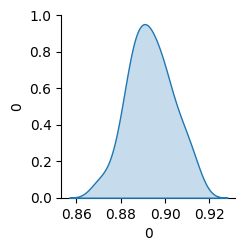

In [ ]:
sns.pairplot(pd.DataFrame(accuracy2_list),
             diag_kind='kde'#,
#             palette='bright'
             ) # pastel, bright, deep, muted, colorblind, dark

plt.show()